<a href="https://colab.research.google.com/github/pantos1/dopp_ex3_city_livability/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt


# Data-oriented programming paradigms
## Exercise 3
### Group 4

Piotr Antosiuk

Husein Gagajew 11775804

Johannes Fesl 11708466


## Loading Data
### Mercer Data:

In [2]:
def load_mercer_data():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
        
    data = pd.concat(datalist)
    data.sort_values(['year'], ascending=True, inplace=True)
    data.set_index(['year', 'City'], inplace=True)
    data.index.set_names(['year', 'City'], inplace=True)
    return data

mercer_data = load_mercer_data()
mercer_data

Country  Rank
year City                          
2010 Vienna           Austria     1
     Canberra       Australia    26
     Calgary           Canada    28
     Singapore      Singapore    28
     Stuttgart        Germany    30
...                       ...   ...
2019 Brussels         Belgium    28
     Stuttgart        Germany    27
     Oslo              Norway    25
     Boston     United States    36
     Wroclaw           Poland   100

[347 rows x 2 columns]

In [3]:
def load_population_data():
  file_url = 'https://raw.githubusercontent.com/pantos1/dopp_ex3_city_livability/master/data/imf/population_area_denisty.csv'
  df = pd.read_csv(file_url, sep=';', encoding='ISO-8859-1')
  df.drop(df.loc[df['Year'] != 2019].index, inplace=True)
  df = df.pivot(index='Country', columns='Series', values='Value')
  return df

population_data = load_population_data()
population_data



Series,Population aged 0 to 14 years old (percentage),Population aged 60+ years old (percentage),Population density,Population mid-year estimates (millions),Population mid-year estimates for females (millions),Population mid-year estimates for males (millions),Sex ratio (males per 100 females)
Country,,,,,,,
Afghanistan,42.4723,4.1655,58.2694,38.0418,18.5120,19.5297,105.4975
Albania,17.3996,20.4779,105.1430,2.8809,1.4141,1.4668,103.7236
Algeria,30.5504,9.6817,18.0763,43.0531,21.3034,21.7497,102.0949
American Samoa,NaN,NaN,276.5600,0.0553,NaN,NaN,NaN
Andorra,NaN,NaN,164.1319,0.0771,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,81.6571,0.0114,NaN,NaN,NaN
Western Sahara,27.4313,6.0364,2.1897,0.5825,0.2777,0.3048,109.7413
Yemen,39.2234,4.5849,55.2341,29.1619,14.4696,14.6923,101.5387


# How do city quality of life rankings change over time (e.g. Mercer,Quality of Life Index Numbeo)?
## Visualization of Ranking Changes in Mercer-Data:

a:\develop\projects\tu\datenorientierte programmierparadigmen\dopp_ex3_city_livability\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
a:\develop\projects\tu\datenorientierte programmierparadigmen\dopp_ex3_city_livability\venv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 2019.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


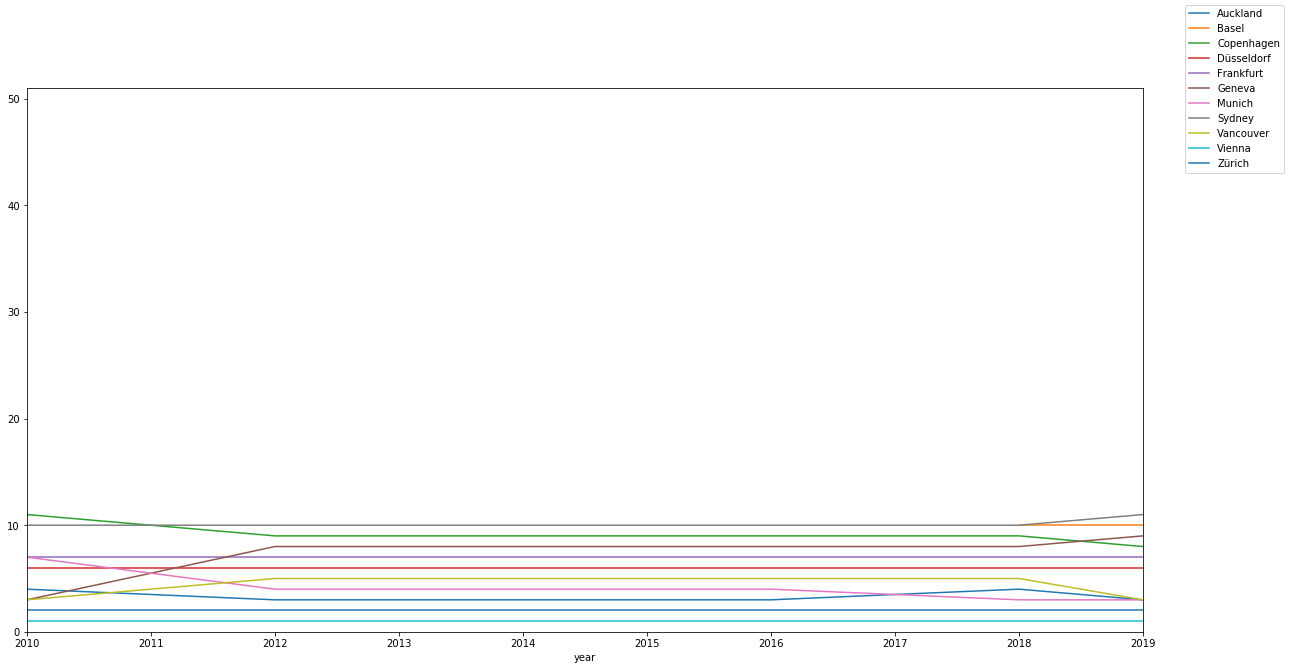

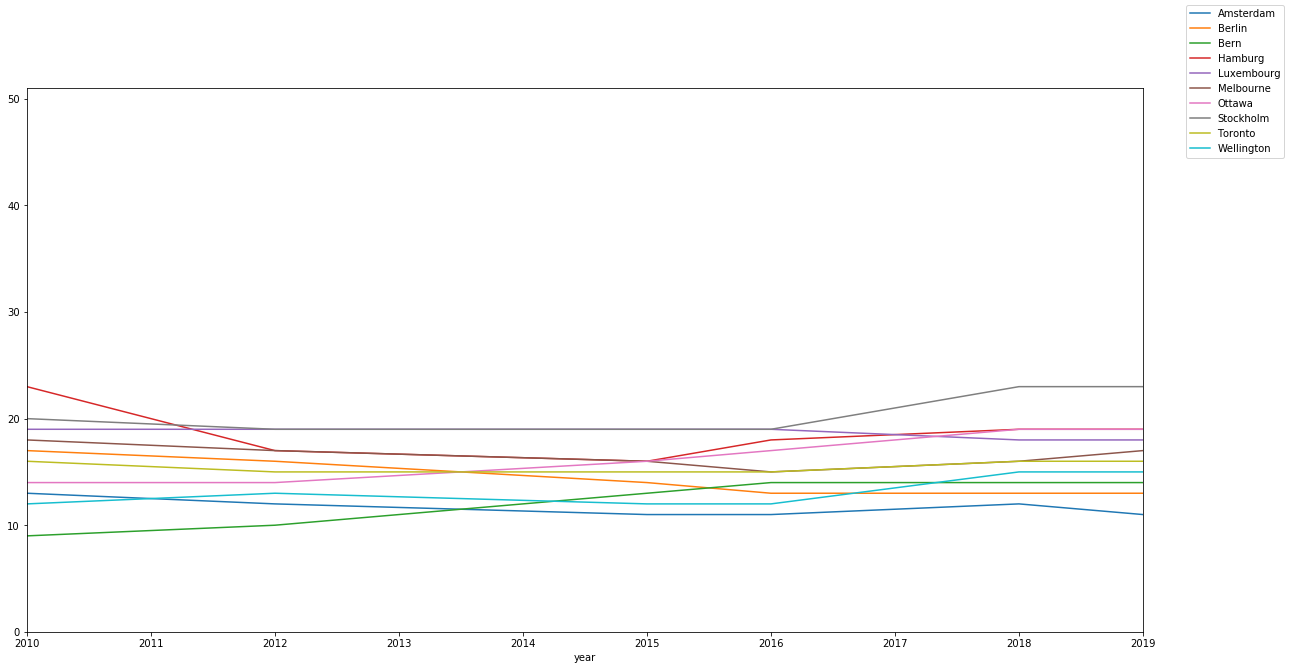

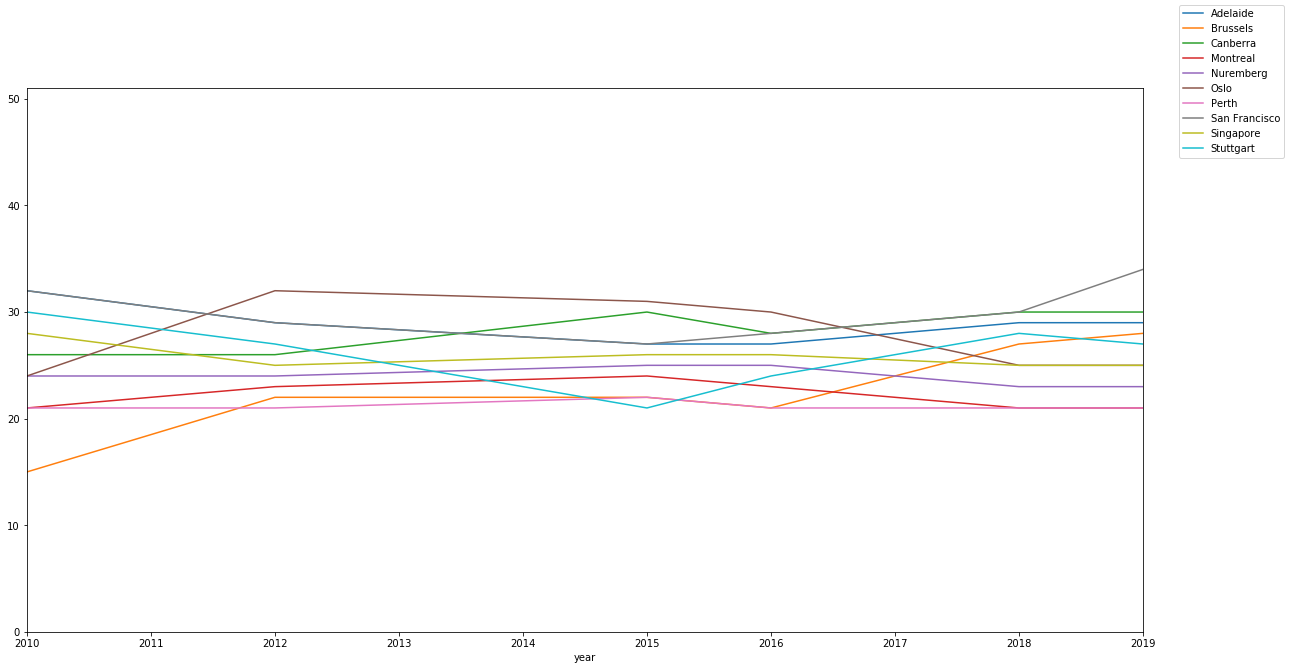

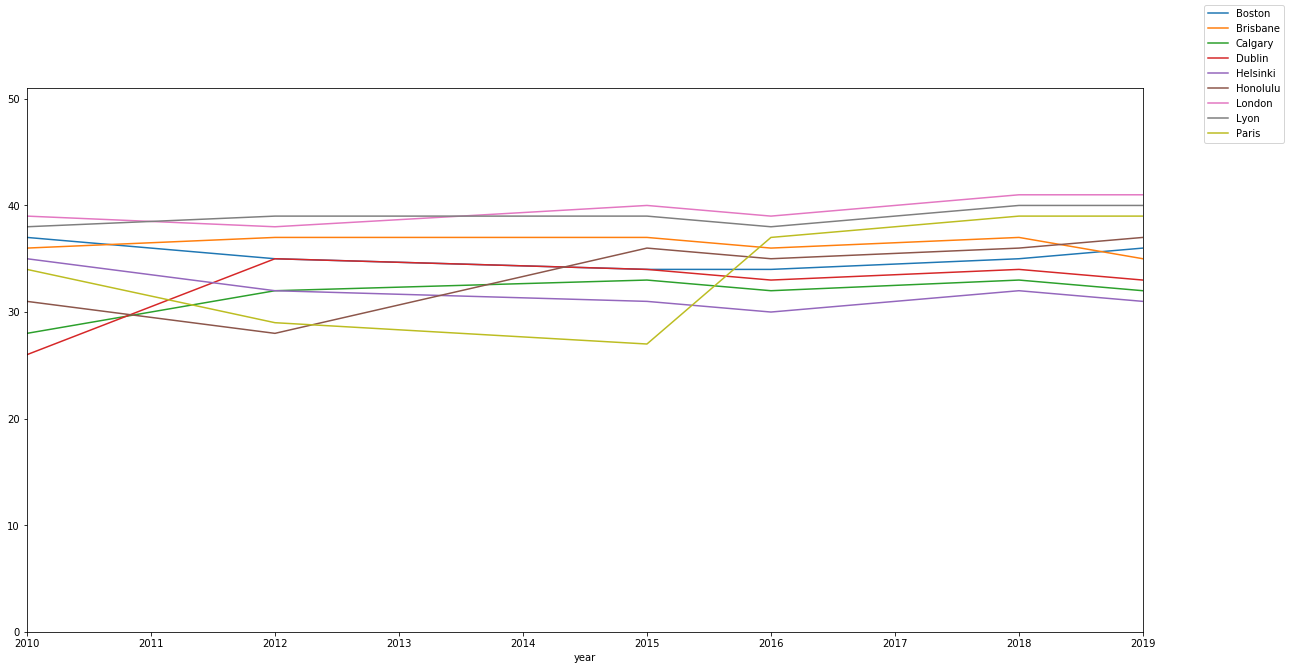

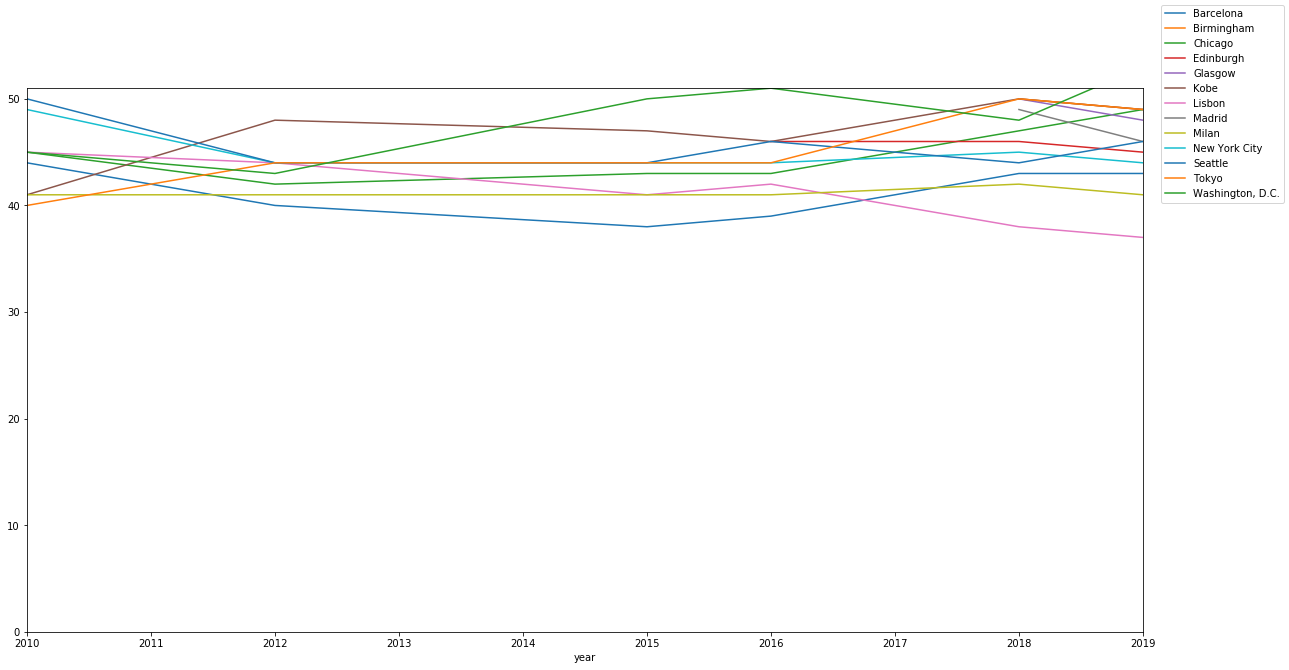

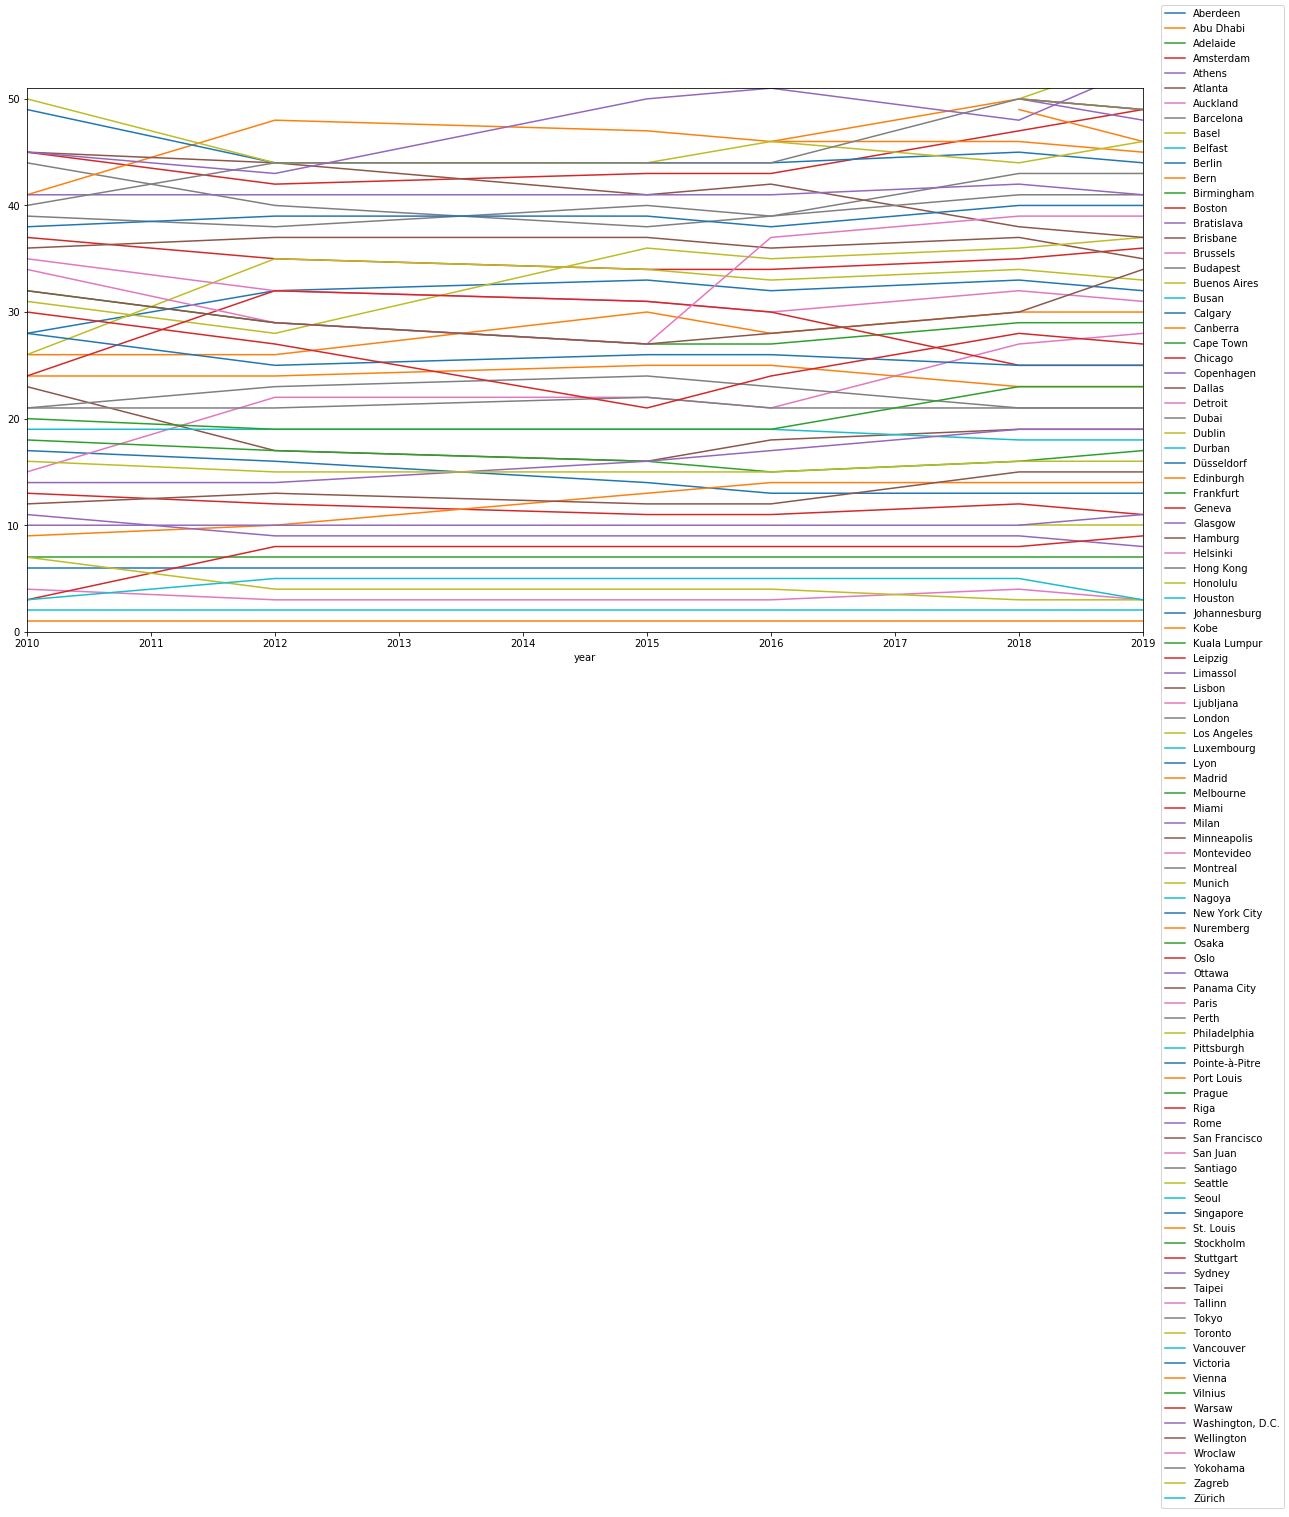

In [4]:
def getTopXCitiesByMedianThatOccurInEveryDataset(topX, dataset):
    mercer_data_topX = dataset[(dataset.groupby('City')['Rank'].transform('median') > topX - 10) & (dataset.groupby('City')['Rank'].transform('median') <= topX)]
    return mercer_data_topX
        
mercer_data_top10 = getTopXCitiesByMedianThatOccurInEveryDataset(10, mercer_data)
mercer_data_top20 = getTopXCitiesByMedianThatOccurInEveryDataset(20, mercer_data)
mercer_data_top30 = getTopXCitiesByMedianThatOccurInEveryDataset(30, mercer_data)
mercer_data_top40 = getTopXCitiesByMedianThatOccurInEveryDataset(40, mercer_data)
mercer_data_top50 = getTopXCitiesByMedianThatOccurInEveryDataset(50, mercer_data)


def plotRankingChangesOfData(cur_dataset, filename):
    fig = plt.figure(figsize=(20, 10))
    cur_dataset = cur_dataset.reset_index()
    cur_dataset.set_index(['year'], inplace=True)
    cur_dataset = cur_dataset.groupby('City')
    plt.ylim(0, 51)
    cur_dataset.Rank.plot()
    fig.legend()
    fig.savefig(filename)
    
plotRankingChangesOfData(mercer_data_top10, 'images/mercer/rankingChangeTop10.png')
plotRankingChangesOfData(mercer_data_top20, 'images/mercer/rankingChangeTop20.png')
plotRankingChangesOfData(mercer_data_top30, 'images/mercer/rankingChangeTop30.png')
plotRankingChangesOfData(mercer_data_top40, 'images/mercer/rankingChangeTop40.png')
plotRankingChangesOfData(mercer_data_top50, 'images/mercer/rankingChangeTop50.png')
plotRankingChangesOfData(mercer_data, 'images/mercer/rankingChange.png')


## Calculation of mean-difference between ranking-dates of Mercer-Data:

City,Aberdeen,Abu Dhabi,Adelaide,Amsterdam,Athens,Atlanta,Auckland,Barcelona,Basel,Belfast,...,Victoria,Vienna,Vilnius,Warsaw,"Washington, D.C.",Wellington,Wroclaw,Yokohama,Zagreb,Zürich
year,,,,,,,,,,,,,,,,,,,,,
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,3.0,1.0,NaN,NaN,1.0,4.0,NaN,NaN,...,NaN,0.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,0.0
2015,NaN,NaN,2.0,1.0,NaN,NaN,0.0,2.0,NaN,NaN,...,NaN,0.0,NaN,NaN,7.0,1.0,NaN,NaN,NaN,0.0
2016,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,0.0
2018,NaN,NaN,2.0,1.0,NaN,NaN,1.0,4.0,NaN,NaN,...,NaN,0.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,0.0
2019,NaN,NaN,0.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,...,NaN,0.0,NaN,NaN,5.0,0.0,NaN,NaN,NaN,0.0


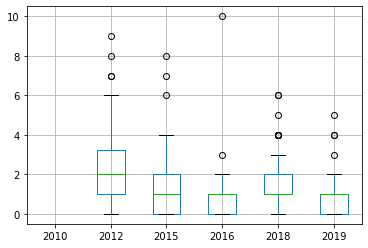

In [6]:
def calculateMedianRankingChangePerCity():
    files = glob.glob('data/mercer_*.csv')
    datalist = []
    for file in files:
        year = int(file[12:16])
        df = pd.read_csv(file, sep=';', header=0, encoding='ISO-8859-1').assign(year=year)
        datalist.append(df)
    data = pd.concat(datalist)
    data = data.pivot(index='year', columns='City', values='Rank')
    data = data.diff()
    data = data.abs()
    data.T.boxplot()
    
    return data


mercer_data_groupedByCity = calculateMedianRankingChangePerCity()
    
        